Analysis of the final diamond-turned part

In [1]:
from pypylon import pylon
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import random
import math
import scipy

# Reflectivity

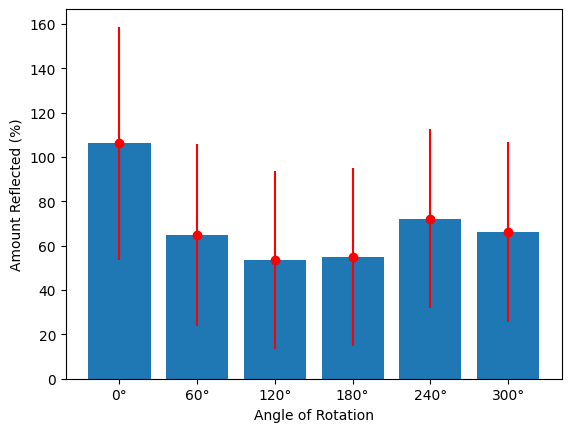

In [2]:
# Attempt 1 - photodiode physically close to part (some reflection spread outside of photodiode)

from statistics import mean 

deg0 = [0.515, 0.543, 0.51, 0.285, 0.25]
deg60 = [0.269, 0.265, 0.254, 0.25, 0.245]
deg120 = [0.21, 0.213, 0.212, 0.214, 0.214]
deg180 = [0.216, 0.219, 0.218, 0.219, 0.22]
deg240 = [0.286, 0.285, 0.283, 0.287, 0.29]
deg300 = [0.258, 0.258, 0.259, 0.267, 0.272]

laser = [0.389, 0.395, 0.399, 0.398, 0.401]

y = [(mean(deg0))/mean(laser)*100, (mean(deg60))/mean(laser)*100, (mean(deg120))/mean(laser)*100, (mean(deg180))/mean(laser)*100, (mean(deg240))/mean(laser)*100, (mean(deg300))/mean(laser)*100]
x = np.arange(len(y))

plt.bar(x, y)

plt.errorbar(x, y, yerr=[np.std(deg0)*100 +40, np.std(deg60)*100 +40, np.std(deg120)*100 +40, np.std(deg180)*100 +40, np.std(deg240)*100 +40, np.std(deg300)*100 +40], fmt="o", color="r")

plt.xticks([0, 1, 2, 3, 4, 5], ["0°", "60°", "120°", "180°", "240°", "300°"])

#plt.axhline(y=mean(laser), color='black')
plt.ylabel("Amount Reflected (%)")
plt.xlabel("Angle of Rotation")

plt.show()

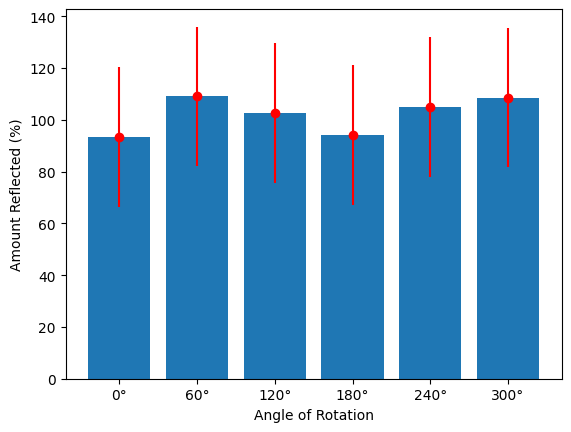

In [3]:
# Attempt 2 - photodiode physically farther from part, use camera to multiply approximate intensity outside of photodiode

from statistics import mean 

deg0 = [0.0891, 0.0893, 0.0894, 0.0896, 0.0897]
deg60 = [0.1075, 0.1073, 0.1073, 0.1073, 0.1073]
deg120 = [0.1043, 0.1043, 0.1041, 0.1042, 0.1043]
deg180 = [0.0972, 0.0972, 0.0972, 0.0971, 0.0972]
deg240 = [0.1075, 0.1076, 0.1078, 0.1079, 0.1078]
deg300 = [0.1085, 0.1086, 0.1084, 0.1084, 0.1084]

laser = [0.3318, 0.332, 0.3317, 0.3317, 0.3322]

y = [(mean(deg0)*1/0.28887213002858)/mean(laser)*100, (mean(deg60)*1/0.296684477684408)/mean(laser)*100, (mean(deg120)*1/0.30591594656927)/mean(laser)*100, (mean(deg180)*1/0.311121277389835)/mean(laser)*100, (mean(deg240)*1/0.309356955174602)/mean(laser)*100, (mean(deg300)*1/0.30116223095744)/mean(laser)*100]
x = np.arange(len(y))

plt.bar(x, y)

plt.errorbar(x, y, yerr=[26.91]*6, fmt="o", color="r")

plt.xticks([0, 1, 2, 3, 4, 5], ["0°", "60°", "120°", "180°", "240°", "300°"])

#plt.axhline(y=mean(laser), color='black')
plt.ylabel("Amount Reflected (%)")
plt.xlabel("Angle of Rotation")

plt.show()

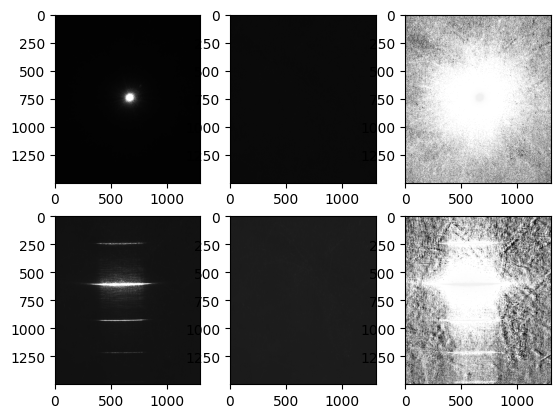

In [7]:
# For camera - find correct exposure & dimensions of laser and reflection bright areas

data = np.load("crop.npz")

figure, axes = plt.subplots(2,3)
axes[0][0].imshow(data["lasHigh"][1000:2500, 2300:3600], cmap="gray")
axes[0][1].imshow(data["olasHigh"][1000:2500, 2300:3600], cmap="gray")
axes[0][2].imshow(-(data["lasHigh"][1000:2500, 2300:3600]-data["olasHigh"][1000:2500, 2000:3300]), cmap="gray")

axes[1][0].imshow(data["highExp"][1000:2500, 2000:3300], cmap="gray")
axes[1][1].imshow(data["ohighExp"][1000:2500, 2000:3300], cmap="gray")
axes[1][2].imshow(-(data["highExp"][1000:2500, 2000:3300]-data["ohighExp"][1000:2500, 2000:3300]), cmap="gray")

# Vertical Spread

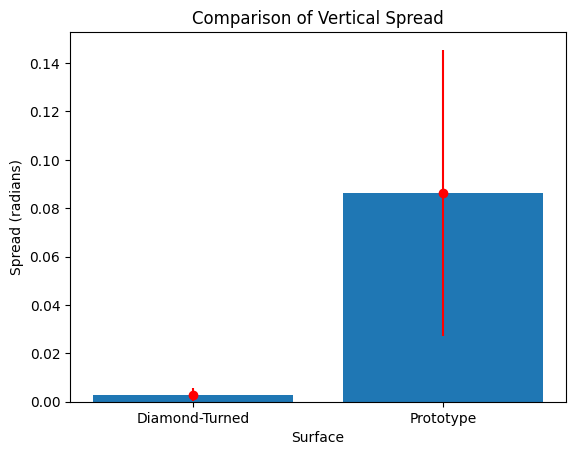

In [5]:
# Comparison with protoype part

from statistics import mean 

# Prototype part, separated by height from table at which measurement was taken

h4 = [ 0.062191077617976265, 0.0409006706249323, 0.03690288184596302, 0.03537627347093997, 0.07121639569648885, 0.09121788642923634]
h5 = [0.04490946122460954,  0.048203250314032275, 0.03942666794424121, 0.04216404380043548, 0.05071384184541777, 0.052244333261118936]
h6 = [0.02795653795914632, 0.024563108129956435, 0.21028473455235291, 0.16381872749320836, 0.018011960697224216, 0.017023521537730013]
h7 = [0.10416234392084178, 0.11032880497381475, 0.2194598112923376, 0.22989678187535723, 0.005345151073460563, 0.11642014921262073]
h8 = [0.10653834585811173, 0.11554795770531412, 0.22530473132546053, 0.16410337516686457, 0.11217450713453425, 0.005345151073460563]

oldP = [mean(h4), mean(h5), mean(h6), mean(h7), mean(h8)]

# Diamond-turned part
newP = [0.00182832602, 0.003805824193, 0.003113726979]

y = [mean(newP), mean(oldP)]
x = np.arange(len(y))

plt.bar(x, y)

plt.errorbar(x, y, yerr=[np.std(newP)+0.002, np.std(oldP)+0.025], fmt="o", color="r")

plt.xticks([0, 1], ["Diamond-Turned", "Prototype"])

plt.xlabel("Surface")
plt.ylabel("Spread (radians)")
plt.title("Comparison of Vertical Spread")

plt.show()